In [54]:
# Biblioteca para baixar arquivos do Google Drive
!pip install gdown

In [55]:
import os, gdown

csv_file = 'card_transdata.csv'

if not os.path.exists(csv_file):
    # Baixa o arquivo do Google Drive
    gdown.download(id='1mvP2vd-c1jpzQsRdgeOVOfbAm804DEMM', output=csv_file)
else:
    print(f'Arquivo {csv_file} já se encontra nesta sessão do colab')

Arquivo card_transdata.csv já se encontra nesta sessão do colab


In [58]:
import pandas as pd
import plotly.express as px

In [59]:
dataframe = pd.read_csv(csv_file)

In [60]:
dataframe.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
dataframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [62]:
dataframe.dtypes

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,float64
used_chip,float64
used_pin_number,float64
online_order,float64
fraud,float64


In [63]:
dataframe.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [64]:
# Método padrão de correlação: Pearson
dataframe.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [65]:
dataframe.corr(method='spearman')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.001068,-0.000152,0.559724,-0.000118,-0.000338,-0.001812,0.095032
distance_from_last_transaction,-0.001068,1.000000,-0.000111,-0.001352,-0.000165,0.000555,-0.001076,0.034661
ratio_to_median_purchase_price,-0.000152,-0.000111,1.000000,0.001202,-0.000099,0.000251,-0.000376,0.342838
repeat_retailer,0.559724,-0.001352,0.001202,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000118,-0.000165,-0.000099,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.000338,0.000555,0.000251,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001812,-0.001076,-0.000376,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.095032,0.034661,0.342838,-0.001357,-0.060975,-0.100293,0.191973,1.000000


**Vamos limpar os dados, utilizando somente as variáveis com maior correlação em relação a fraude**

*   **Variáveis a serem utilizadas**:
    * **ratio_to_median_purchase_price** - 1º lugar em ambas as análises
    * **online_order** - 2º lugar em ambas as análises
    * **distance_from_home** - 3º lugar via "Pearson" e 4º via "Spearman"
    * **used_pin_number** - 4º lugar via "Pearson" e 3º via "Spearman"

*   **Variáveis descartadas**:
    * **used_chip** - além da correlação não ser das maiores, vimos que muitas linhas possuíam, ao mesmo tempo, a condição "TRUE" de venda online ("online_order") e uso do chip ("used_chip"), o que não faz muito sentido
    * **repeat_retailer** - correlação mais baixa de todas
    * **distance_from_last_transaction** - segunda mais baixa correlação



In [66]:
#Vamos dropar a primeira coluna - se usou chip
dataframe_sem_chip = dataframe.drop(['used_chip'], axis=1)

In [67]:
#Vamos dropar a segunda coluna - se o vendedor é o mesmo
dataframe_sem_repeat_retailer = dataframe_sem_chip.drop(['repeat_retailer'], axis=1)

In [68]:
#Vamos dropar a terceira coluna - distância para a última transação
dataframe_limpo_final = dataframe_sem_repeat_retailer.drop(['distance_from_last_transaction'], axis=1)

In [69]:
#vamos imprimir o dataframe novo limpo
dataframe_limpo_final.describe()

,distance_from_home,ratio_to_median_purchase_price,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,1.824182,0.100608,0.650552,0.087403
std,65.390784,2.799589,0.300809,0.476796,0.282425
min,0.004874,0.004399,0.000000,0.000000,0.000000
25%,3.878008,0.475673,0.000000,0.000000,0.000000
50%,9.967760,0.997717,0.000000,1.000000,0.000000
75%,25.743985,2.096370,0.000000,1.000000,0.000000
max,10632.723672,267.802942,1.000000,1.000000,1.000000


In [70]:
number_of_fraud = len(dataframe_limpo_final[dataframe['fraud'] == 1])
number_of_not_fraud = len(dataframe[dataframe_limpo_final['fraud'] == 0])
print(f'Número de transações com fraude: {number_of_fraud}')
print(f'Número de transações sem fraude: {number_of_not_fraud}')
print(f'Porcentagem de transações com fraude: {number_of_fraud / len(dataframe) * 100}%')

Número de transações com fraude: 87403
Número de transações sem fraude: 912597
Porcentagem de transações com fraude: 8.7403%


**Agora que já limpamos, vamos novamente imprimir as correlações que ficaram, nos dois métodos**

In [71]:
#importar biblioteca que faz o mapa de calor com as correlações
import seaborn as sns

<Axes: >

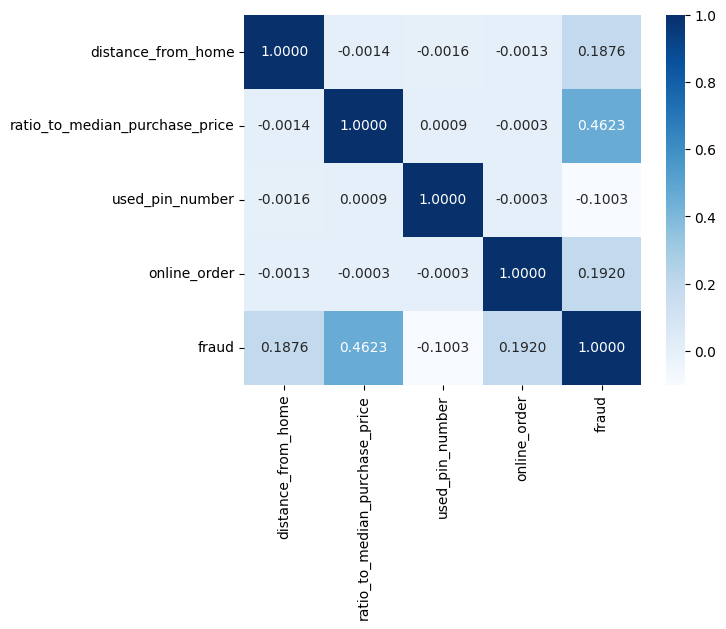

In [72]:
dataframe_pearson = dataframe_limpo_final.corr("pearson")
sns.heatmap(dataframe_pearson, xticklabels = dataframe_pearson.columns, yticklabels = dataframe_pearson.columns, annot = True, fmt=".4f",cmap = "Blues")

<Axes: >

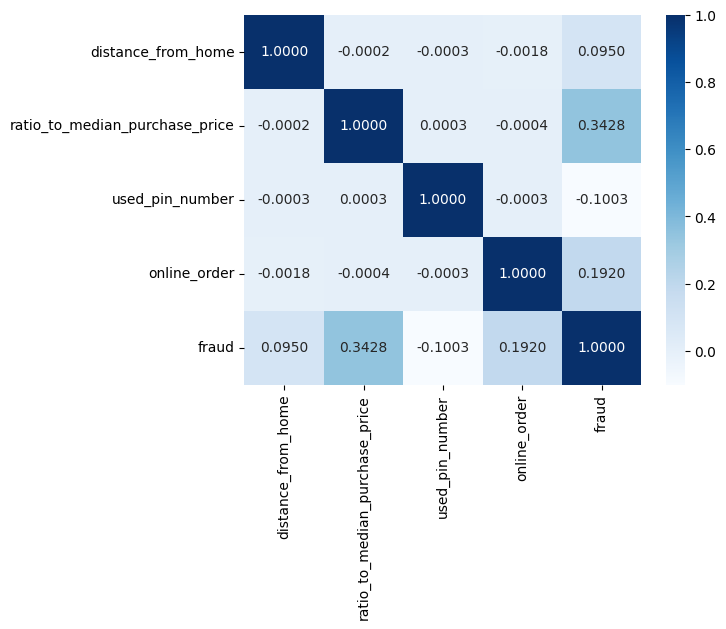

In [73]:
dataframe_spearman = dataframe_limpo_final.corr("spearman")
sns.heatmap(dataframe_spearman, xticklabels = dataframe_spearman.columns, yticklabels = dataframe_spearman.columns, annot = True, fmt=".4f",cmap = "Blues")

In [74]:
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [75]:
#vamos separar as variáveis previsoras e a variável de classe (meta)
x_fraud_data = dataframe_limpo_final.iloc[:, 0:4].values
x_fraud_data

array([[57.87785658,  1.94593998,  0.        ,  0.        ],
       [10.8299427 ,  1.29421881,  0.        ,  0.        ],
       [ 5.09107949,  0.42771456,  0.        ,  1.        ],
       ...,
       [ 2.91485699,  0.21807549,  0.        ,  1.        ],
       [ 4.25872939,  0.47582206,  0.        ,  1.        ],
       [58.10812496,  0.38691985,  0.        ,  1.        ]])

In [93]:
y_fraud_data = dataframe_limpo_final.iloc[:,4].values
# y_fraud_data

for i in range(len(y_fraud_data)):
  if y_fraud_data[i] == 1:
    print('tem 1', x_fraud_data[i])
    break


tem 1 [1.35463e+05 9.54139e+05 0.00000e+00 1.00000e+00]


In [78]:
label_enconder_distance = LabelEncoder()
label_enconder_ratio = LabelEncoder()
label_enconder_pin = LabelEncoder()
label_enconder_online = LabelEncoder()

In [79]:
x_fraud_data[:,0] = label_enconder_distance.fit_transform(x_fraud_data[:,0])
x_fraud_data[:,1] = label_enconder_ratio.fit_transform(x_fraud_data[:,1])
x_fraud_data[:,2] = label_enconder_pin.fit_transform(x_fraud_data[:,2])
x_fraud_data[:,3] = label_enconder_online.fit_transform(x_fraud_data[:,3])

x_fraud_data

array([[8.94929e+05, 7.28245e+05, 0.00000e+00, 0.00000e+00],
       [5.23794e+05, 5.93647e+05, 0.00000e+00, 0.00000e+00],
       [3.15799e+05, 2.20174e+05, 0.00000e+00, 1.00000e+00],
       ...,
       [1.90101e+05, 8.31020e+04, 0.00000e+00, 1.00000e+00],
       [2.71885e+05, 2.50110e+05, 0.00000e+00, 1.00000e+00],
       [8.95431e+05, 1.93978e+05, 0.00000e+00, 1.00000e+00]])

In [80]:
neural_network_fraud = MLPClassifier()
neural_network_fraud.fit(x_fraud_data, y_fraud_data)

MLPClassifier()

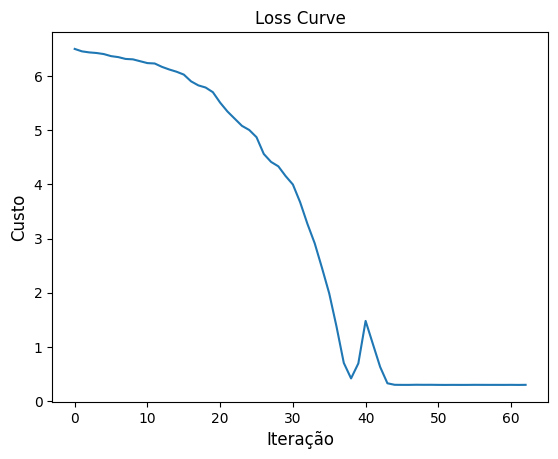

In [81]:
plt.plot(neural_network_fraud.loss_curve_)
plt.title("Loss Curve", fontsize=12)
plt.xlabel("Iteração", fontsize=12)
plt.ylabel("Custo", fontsize=12)
plt.show()

In [94]:
previsoes = neural_network_fraud.predict([[1.35463e+05, 9.54139e+05, 0.00000e+00, 1.00000e+00]])
previsoes

array([0.])

In [45]:
previsoes = neural_network_fraud.predict(x_fraud_data)
previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
previsoes_df = pd.DataFrame(previsoes, columns=['previsoes'])
previsoes_df[previsoes_df['previsoes'] == 1]

,previsoes


**Daqui pra baixo é tudo lixo**

In [ ]:
# ideia work in progress
dataframe_apenas_online = dataframe[dataframe['online_order'] == 1].drop('online_order', axis=1) # Avaliar necessidade de dropar também a coluna distance_from_home
dataframe_apenas_online.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,fraud
count,650552.000000,650552.000000,650552.000000,650552.000000,650552.000000,650552.000000,650552.00000
mean,26.566435,5.039188,1.823505,0.881410,0.350322,0.100544,0.12714
std,65.040899,26.915736,2.796166,0.323306,0.477071,0.300724,0.33313
min,0.004874,0.000319,0.004399,0.000000,0.000000,0.000000,0.00000
25%,3.877650,0.296006,0.475435,1.000000,0.000000,0.000000,0.00000
50%,9.948229,0.995626,0.997604,1.000000,0.000000,0.000000,0.00000
75%,25.678092,3.353511,2.095678,1.000000,1.000000,0.000000,0.00000
max,10632.723672,11851.104565,266.689692,1.000000,1.000000,1.000000,1.00000


In [ ]:
#DISCUSSÃO - faz sentido na compra online verificar o chip?
# Como a correlação é baixa, vamos simplesmente dropar a coluna com esses dados, mas usar as linhas das entradas
# calcular entradas que foram online e, ao mesmo tempo, utilizaram chip
dataframe[(dataframe['online_order'] == 1) & (dataframe['used_chip'] == 1)].shape[0]
#dropar a coluna relativa no datafram
#TODO

227903

In [ ]:
#DISCUSSÃO2 - faz sentido na compra online utilizar o pin (senha)?
#Nesse caso, por conta da boa correlação (#4), vamos utilizar a coluna, considerando que, no caso de compras online, o pin é na realidade o CVV
#calcular entradas que foram online e, ao mesmo tempo, utilizaram pin (senha)
dataframe[(dataframe['online_order'] == 1) & (dataframe['used_pin_number'] == 1)].shape[0]

65409